<a href="https://colab.research.google.com/github/Mohan75489/DeepLearning_PyTorch/blob/main/PyTorch_Images_and_LR_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all required libraries
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#downloading training dataset
dataset = MNIST(root = 'data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#to check the loaded dataset length
len(dataset)

60000

In [4]:
#creating test dataset and checking how many
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
#checking a random sample
dataset[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F42FFC00A90>, 2)

In [7]:
#to view the image, importing matploblib
import matplotlib.pyplot as plt
#to show plots in the book, instead of pop-up (anything that begins with % sign is called magic command)
%matplotlib inline 

Label1: 3


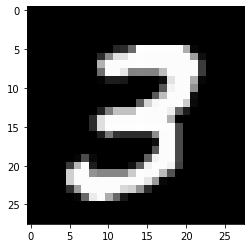

In [8]:
#plotting an image from the dataset
image, label = dataset[7]
plt.imshow(image, cmap='gray')
print('Label1:',label)

In [9]:
#PyTorch operates in tensors, it doesn't know images. It requires transformation of images to tensors.
import torchvision.transforms as transforms

In [10]:
#tranforming dataset to tensors for training
dataset = MNIST(root = 'data/', train=True, transform = transforms.ToTensor())

In [11]:
#printing tranformed tensor to view shape
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


- Image is converted into 3D tensor, 1 represents colour, 28 and 28 represent x and y dimension.
- So, each pixel is conveted into an elelemtn of tensor

In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


- Eelement represent colur of pixel.
- 1 is of Black and 2 is of White, everything in between are shades of gray.

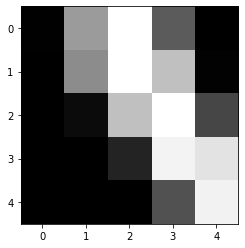

In [16]:
#plotting a 10-15 vertical and horizontal elements of tensor
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [18]:
#random training set selection from 60000 dataset
#test set only used to model is working, during research
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [19]:
#dataloding in batches, training data with shuffle on
from torch.utils.data import DataLoader
batch_size = 150
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size)